# Tugas 3 : Implementasi Algoritma Logistic Regression

## Import Library

In [ ]:
# library awal untuk perhitungan dan pengolahan teks
import numpy as np
import pandas as pd

# library untuk proses modeling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# library untuk evaluasi model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# save model
import pickle


Mengimpor semua pustaka yang dibutuhkan untuk pemrosesan data, pelatihan model, evaluasi model, dan visualisasi.

## Memuat Data

In [ ]:
# Memuat data dari file CSV dengan judul 'output_cleaned.csv'
main_df = pd.read_csv('output_cleaned.csv', delimiter=',')
print(main_df.columns)  # Menampilkan nama-nama kolom dalam DataFrame


Index(['Judul Berita', 'Isi Berita', 'Tanggal Berita', 'acara', 'acu', 'adb',
       'adhi', 'adil', 'administrasi', 'agus',
       ...
       'waris', 'website', 'wib', 'widodo', 'wisata', 'xxi', 'yatra', 'yessy',
       'yogyakarta', 'Kategori Berita'],
      dtype='object', length=679)


Memuat dataset dari file CSV ke dalam DataFrame Pandas dan menampilkan kolom-kolom yang tersedia.

## Pra-pemrosesan Data

In [ ]:
# menggunakan label_encoder untuk merubah kata menjadi angka
label_encoder = preprocessing.LabelEncoder()
main_df['Kategori Berita'] = label_encoder.fit_transform(main_df['Kategori Berita'])

# Menangani nilai NaN di kolom 'Isi Berita'
main_df['Isi Berita'] = main_df['Isi Berita'].fillna('')  # Mengganti NaN dengan string kosong


Mengubah kategori berita menjadi format numerik menggunakan LabelEncoder.Menangani nilai NaN dengan menggantinya menjadi string kosong, agar tidak menimbulkan kesalahan saat memproses teks.

## Mengubah Teks menjadi Numerik

In [ ]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi numerik
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(main_df['Isi Berita'])  # Menggunakan kolom yang sesuai
y = main_df['Kategori Berita']


Menggunakan TfidfVectorizer untuk mengubah isi berita menjadi representasi numerik berbasis TF-IDF, yang dapat digunakan sebagai input model.X adalah fitur (input) dan y adalah target (output) untuk model.

## Pembagian Data

In [ ]:
# split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


Membagi dataset menjadi data pelatihan (80%) dan data pengujian (20%) untuk melatih dan menguji model.

## Pelatihan Model

In [ ]:
# fit model untuk training
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Membangun model regresi logistik dan melatihnya menggunakan data pelatihan.

## Prediksi

In [ ]:
# mencoba prediksi dari hasi fitting model
y_pred = model_LR.predict(X_test)

# Melihat nilai actual dan predicted
hasil = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
hasil.head()


,Actual value,Predicted value
83,1,1
30,1,1
56,0,1
24,0,1
16,0,0


Menggunakan model yang telah dilatih untuk melakukan prediksi pada data pengujian.Menampilkan perbandingan nilai aktual dan nilai prediksi.

## Evaluasi Model

In [ ]:
# Evaluasi model
print("\n=== Evaluasi Model ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matriks :\n", confusion_matrix(y_test, y_pred))

# Laporan klasifikasi
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nLaporan Klasifikasi:\n", report)



=== Evaluasi Model ===
Akurasi: 0.8

Confusion Matriks :
 [[9 4]
 [0 7]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

      Bisnis       1.00      0.69      0.82        13
    Nasional       0.64      1.00      0.78         7

    accuracy                           0.80        20
   macro avg       0.82      0.85      0.80        20
weighted avg       0.87      0.80      0.80        20



Menghitung dan menampilkan akurasi model.Menampilkan Confusion matriks untuk analisis kesalahan.Menampilkan laporan klasifikasi yang mencakup precision, recall, dan F1-score.

## Visualisasi Confusion Matriks

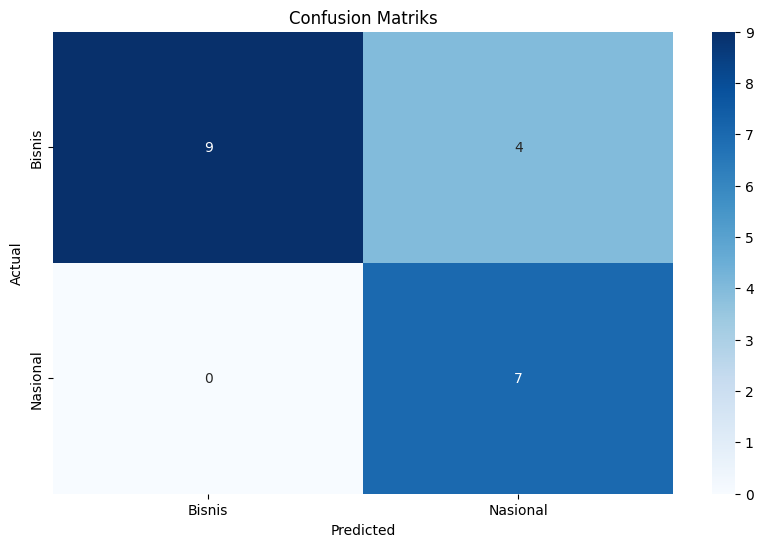

In [ ]:
# Menggambarkan matriks Confusion
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matriks')
plt.show()


Menggambarkan Confusion matriks dalam bentuk heatmap untuk visualisasi yang lebih mudah dibaca.

In [ ]:
filename = 'model_LR.sav'
pickle.dump(model_LR, open(filename, 'wb'))